In [1]:
pairs = []
labels = []

In [ ]:
import os
import random

# กำหนดโฟลเดอร์หลัก
root_dir = 'dataset'

# ฟังก์ชันในการสร้างคู่ภาพ
def create_pairs(root_dir):
    pairs = []
    labels = []
    
    # ใช้ for loop ผ่านโฟลเดอร์หลัก s_ss1, s_ss2, w_ls1, w_ls2
    for folder_name in os.listdir(root_dir):
        folder_path = os.path.join(root_dir, folder_name)
        
        if os.path.isdir(folder_path):  # ตรวจสอบว่าเป็นโฟลเดอร์
            images = [os.path.join(folder_path, img) for img in os.listdir(folder_path)]
            
            # สร้างคู่ที่เป็น 1 (ของจริง) - ภาพจากโฟลเดอร์เดียวกัน
            for i in range(len(images)):
                for j in range(i+1, len(images)):
                    pairs.append((images[i], images[j]))
                    labels.append(1)  # 1 = ของจริง
            # สร้างคู่ที่เป็น 0 (ปลอม) - ภาพจากโฟลเดอร์ต่างกัน
            for other_folder in os.listdir(root_dir):
                if other_folder != folder_name:
                    other_folder_path = os.path.join(root_dir, other_folder)
                    other_images = [os.path.join(other_folder_path, img) for img in os.listdir(other_folder_path)]
                    
                    # สร้างคู่ภาพปลอม
                    for i in range(len(images)):
                        for j in range(len(other_images)):
                            pairs.append((images[i], other_images[j]))
                            labels.append(0)  # 0 = ปลอม
                        
    return pairs, labels

In [ ]:
pairs, labels = create_pairs(root_dir)
for pair, label in zip(pairs[:5], labels[:5]):
    print(f"Pair: {pair}, Label: {label}")

Pair: ('dataset/s_ss2_97/s_ss297sampNo1.png', 'dataset/s_ss2_97/s_ss297sampNo3.png'), Label: 1
Pair: ('dataset/s_ss2_97/s_ss297sampNo1.png', 'dataset/s_ss2_97/s_ss297sampNo4.png'), Label: 1
Pair: ('dataset/s_ss2_97/s_ss297sampNo1.png', 'dataset/s_ss2_97/s_ss297sampNo2.png'), Label: 1
Pair: ('dataset/s_ss2_97/s_ss297sampNo1.png', 'dataset/s_ss2_97/s_ss297sampNo5.png'), Label: 1
Pair: ('dataset/s_ss2_97/s_ss297sampNo3.png', 'dataset/s_ss2_97/s_ss297sampNo4.png'), Label: 1


In [13]:
# เช็คจำนวนคู่ที่มี label เป็น 1 (ของจริง)
num_ones = labels.count(1)

# เช็คจำนวนคู่ที่มี label เป็น 0 (ปลอม)
num_zeros = labels.count(0)

print(f"จำนวนคู่ที่เป็น 1 (ของจริง): {num_ones}")
print(f"จำนวนคู่ที่เป็น 0 (ปลอม): {num_zeros}")

จำนวนคู่ที่เป็น 1 (ของจริง): 28100
จำนวนคู่ที่เป็น 0 (ปลอม): 7781000


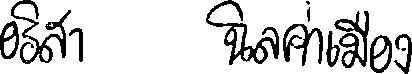

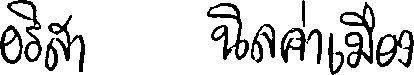

Showing pair_type 1:
Image 1: dataset/w_ls1_7/w_ls17sampNo23.png
Image 2: dataset/w_ls1_7/w_ls17sampNo25.png


In [40]:
import random
from PIL import Image

def show_random_pair(pairs, labels, pair_type=1):
    """
    ฟังก์ชันนี้จะสุ่มเลือกคู่ภาพจาก pairs และแสดงผลตามที่กำหนด
    pair_type = 1 สำหรับคู่เหมือน (label = 1) 
    pair_type = 0 สำหรับคู่ต่าง (label = 0)
    """
    # กรองคู่ตามประเภทที่กำหนด (1 สำหรับคู่เหมือน, 0 สำหรับคู่ต่าง)
    if pair_type == 1:
        filtered_pairs = [pair for pair, label in zip(pairs, labels) if label == 1]
    elif pair_type == 0:
        filtered_pairs = [pair for pair, label in zip(pairs, labels) if label == 0]
    else:
        print("Invalid pair_type! Use 0 for forgery or 1 for genuine.")
        return
    
    # ถ้ามีคู่ที่ตรงตามประเภทที่กรองไว้
    if filtered_pairs:
        # เลือกคู่แบบสุ่มจาก filtered_pairs
        pair = random.choice(filtered_pairs)
        img1 = Image.open(pair[0])  # เปิดภาพแรก
        img2 = Image.open(pair[1])  # เปิดภาพที่สอง
        
        # แสดงภาพ
        img1.show(title="Image 1")
        img2.show(title="Image 2")
        
        # แสดงประเภทของคู่ภาพ
        print(f"Showing pair_type {pair_type}:")
        print(f"Image 1: {pair[0]}")
        print(f"Image 2: {pair[1]}")
    else:
        print(f"No pair_type {pair_type} pairs found.")

# ตัวอย่างการใช้งาน
# show_random_pair(pairs, labels, pair_type=1)  # สำหรับคู่เหมือน (label = 1)
# show_random_pair(pairs, labels, pair_type=0)  # สำหรับคู่ต่าง (label = 0)
show_random_pair(pairs, labels, pair_type=1)

In [37]:
genuine_pairs = []  # สำหรับคู่เหมือน (label=1)
forgery_pairs = []  # สำหรับคู่ต่าง (label=0)

# แยกคู่เหมือนและคู่ต่างออกจากกัน
for pair, label in zip(pairs, labels):
    if label == 1:
        genuine_pairs.append(pair)
    else:
        forgery_pairs.append(pair)

# แสดงผลลัพธ์
print(f"จำนวนคู่เหมือน: {len(genuine_pairs)}")
print(f"จำนวนคู่ต่าง: {len(forgery_pairs)}")

จำนวนคู่เหมือน: 28100
จำนวนคู่ต่าง: 7781000


In [41]:
import random

# สมมติว่าเราแยก genuine_pairs และ forgery_pairs ออกมาแล้ว
# genuine_pairs คือ คู่ภาพที่ label=1 (คู่เหมือน)
# forgery_pairs คือ คู่ภาพที่ label=0 (คู่ต่าง)

# สุ่มเลือก 5,000 คู่จากแต่ละกลุ่มสำหรับ training set
genuine_train = random.sample(genuine_pairs, 5000)
forgery_train = random.sample(forgery_pairs, 5000)

# สุ่มเลือก 2,000 คู่จากแต่ละกลุ่มสำหรับ test set
genuine_test = random.sample(genuine_pairs, 2000)
forgery_test = random.sample(forgery_pairs, 2000)

# รวม training และ test set
X_train = genuine_train + forgery_train
X_test = genuine_test + forgery_test

# สร้าง labels สำหรับ training และ test set
y_train = [1] * len(genuine_train) + [0] * len(forgery_train)  # 1 สำหรับคู่เหมือน, 0 สำหรับคู่ต่าง
y_test = [1] * len(genuine_test) + [0] * len(forgery_test)      # 1 สำหรับคู่เหมือน, 0 สำหรับคู่ต่าง

# แสดงผลลัพธ์
print(f"จำนวนคู่ที่ใช้ในการเทรน: {len(X_train)}")
print(f"จำนวนคู่ที่ใช้ในการทดสอบ: {len(X_test)}")

จำนวนคู่ที่ใช้ในการเทรน: 10000
จำนวนคู่ที่ใช้ในการทดสอบ: 4000


In [74]:
image_sizes = check_image_sizes(genuine_pairs)

# แยกขนาดภาพเป็นความกว้างและความสูง
widths, heights = zip(*image_sizes)
# คำนวณค่าทางสถิติของ widths และ heights
max_width = max(widths)
min_width = min(widths)
avg_width = np.mean(widths)

max_height = max(heights)
min_height = min(heights)
avg_height = np.mean(heights)

# แสดงผลลัพธ์
print(f"Width - Max: {max_width}, Min: {min_width}, Average: {avg_width}")
print(f"Height - Max: {max_height}, Min: {min_height}, Average: {avg_height}")

Width - Max: 760, Min: 32, Average: 292.31807829181497
Height - Max: 536, Min: 41, Average: 119.00364768683274


## Data pre-processing

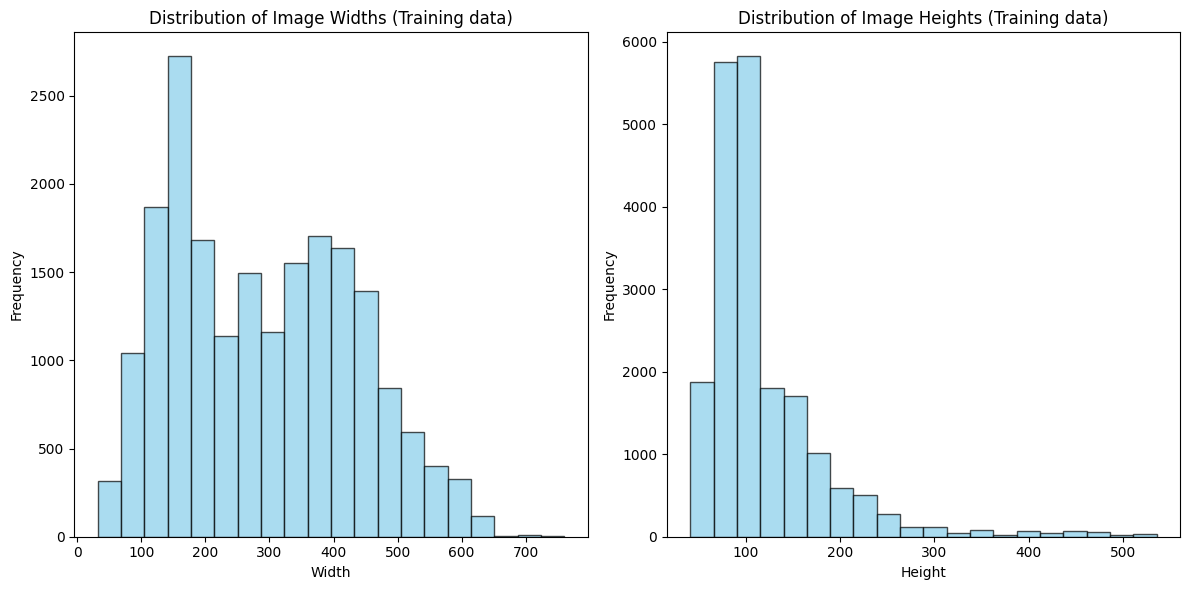

In [58]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def check_image_sizes(pairs):
    image_sizes = []

    for img1, img2 in pairs:
        with Image.open(img1) as im1, Image.open(img2) as im2:
            # เก็บขนาดของทั้งสองภาพใน pair
            image_sizes.append(im1.size)
            image_sizes.append(im2.size)
    
    return image_sizes

# สมมติว่า X_train คือ list ของคู่ภาพ (pairs)
# ตัวอย่างเช่น X_train = [(img1_path, img2_path), (img3_path, img4_path), ...]
image_sizes = check_image_sizes(X_train)

# แยกขนาดภาพเป็นความกว้างและความสูง
widths, heights = zip(*image_sizes)

# แสดง histogram สำหรับความกว้างและความสูงของภาพใน dataset
plt.figure(figsize=(12, 6))

# Histogram สำหรับความกว้างของภาพทั้งหมด
plt.subplot(1, 2, 1)
plt.hist(widths, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Image Widths (Training data)")
plt.xlabel("Width")
plt.ylabel("Frequency")

# Histogram สำหรับความสูงของภาพทั้งหมด
plt.subplot(1, 2, 2)
plt.hist(heights, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Image Heights (Training data)")
plt.xlabel("Height")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [59]:
# คำนวณค่าทางสถิติของ widths และ heights
max_width = max(widths)
min_width = min(widths)
avg_width = np.mean(widths)

max_height = max(heights)
min_height = min(heights)
avg_height = np.mean(heights)

# แสดงผลลัพธ์
print(f"Width - Max: {max_width}, Min: {min_width}, Average: {avg_width}")
print(f"Height - Max: {max_height}, Min: {min_height}, Average: {avg_height}")

Width - Max: 760, Min: 32, Average: 290.7711
Height - Max: 536, Min: 41, Average: 117.48835


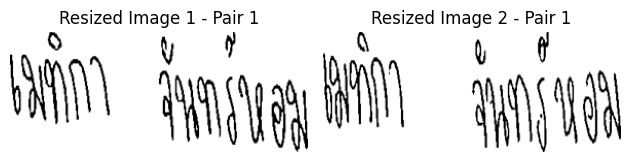

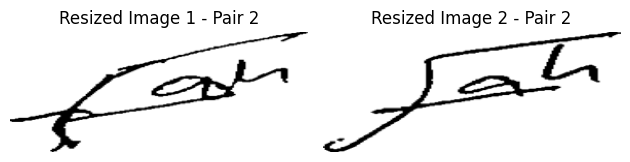

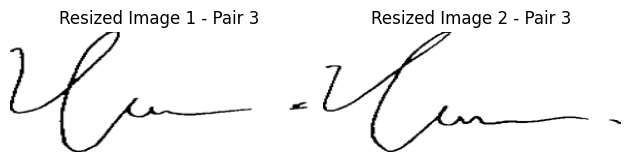

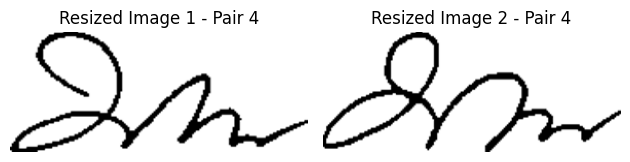

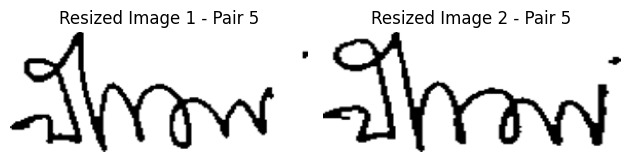

In [79]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# กำหนดขนาดที่ต้องการ
target_width = 290
target_height = 117

# สมมติว่า X_train คือ list ของคู่ภาพ (pairs)
# ตัวอย่างเช่น X_train = [(img1_path, img2_path), (img3_path, img4_path), ...]

resized_images = []

for img1, img2 in X_train:
    with Image.open(img1) as im1, Image.open(img2) as im2:
        # ถ้าภาพเป็น Grayscale (1 channel), แปลงเป็น RGB (3 channels)
        if im1.mode != 'RGB':
            im1 = im1.convert('RGB')
        if im2.mode != 'RGB':
            im2 = im2.convert('RGB')

        # Resize ภาพให้มีขนาดตามที่กำหนด
        im1_resized = im1.resize((target_width, target_height))
        im2_resized = im2.resize((target_width, target_height))
        
        resized_images.append((im1_resized, im2_resized))

# แสดงผลภาพที่ถูก resize
for i, (img1_resized, img2_resized) in enumerate(resized_images[:5]):  # แสดงแค่ 5 คู่แรก
    plt.subplot(1, 2, 1)
    plt.imshow(img1_resized)
    plt.title(f"Resized Image 1 - Pair {i+1}")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(img2_resized)
    plt.title(f"Resized Image 2 - Pair {i+1}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

In [46]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [55]:
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
from statistics import mode, median
import cv2
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch.optim as optim
import pandas as pd
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

random.seed(4)

In [80]:
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms

# กำหนด transform เหมือนเดิม (ปรับตามที่คุณต้องการ)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((117, 290)),  # หรือ (target_height, target_width)
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

class SiameseSignatureDataset(Dataset):
    def __init__(self, pairs, labels, transform=None):
        self.pairs = pairs
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        img1_path, img2_path = self.pairs[idx]
        label = self.labels[idx]
        img1 = Image.open(img1_path)
        img2 = Image.open(img2_path)
        if self.transform:
            img1 = self.transform(img1)
            img2 = self.transform(img2)
        return img1, img2, torch.tensor(label, dtype=torch.float32)

# สร้าง dataset และ dataloader
train_dataset = SiameseSignatureDataset(X_train, y_train, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [82]:
import torch
import torch.nn as nn

class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        self.cnn1 = nn.Sequential(
            nn.Conv2d(1, 20, kernel_size=9, stride=1, padding=4), 
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2),
            nn.MaxPool2d(3, stride=2),  
            nn.Dropout2d(p=0.2),
        
            nn.Conv2d(20, 40, kernel_size=7, stride=1, padding=3), 
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout2d(p=0.2),
        
            nn.Conv2d(40, 80, kernel_size=5, stride=1, padding=2),  
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout2d(p=0.2),
        
            nn.Conv2d(80, 160, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2),
            nn.MaxPool2d(3, stride=2), 
            nn.AdaptiveAvgPool2d((4, 4)), 
            nn.Dropout2d(p=0.2),
        )

        self.fc1 = nn.Sequential(
            nn.Linear(2560, 640),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.2),

            nn.Linear(640, 160),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.2),

            nn.Linear(160,40),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.2),

            nn.Linear(40,10) 
        )

    def _get_flattened_size(self, x):
        x = self.cnn1(x)
        return x.view(x.size(0), -1).shape[1]

    def forward_once(self, x):
        x = self.cnn1(x)
        x = x.view(x.size(0), -1) 
        x = self.fc1(x)
        return x

    def forward(self, input1, input2):
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)
        return output1, output2

class ContrastiveLoss(torch.nn.Module):
    def __init__(self, margin=1.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, x0, x1, y):
        diff = x0 - x1
        dist_sq = torch.sum(torch.pow(diff, 2), 1)
        epsilon = 1e-8
        dist = torch.sqrt(dist_sq+epsilon)
        mdist = self.margin - dist
        dist = torch.clamp(mdist, min=epsilon)
        loss = y * dist_sq + (1 - y) * torch.pow(dist, 2)
        loss = torch.sum(loss) / 2.0 / x0.size()[0]
        return loss

In [84]:
import torch.nn as nn

model = SiameseNetwork()
criterion = ContrastiveLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [85]:
num_epochs = 10

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for img1, img2, label in train_loader:
        img1, img2, label = img1.to(device), img2.to(device), label.to(device)
        
        optimizer.zero_grad()
        output1, output2 = model(img1, img2)
        
        # Euclidean distance between embeddings
        diff = output1 - output2
        dist = torch.sqrt(torch.sum(torch.pow(diff, 2), 1) + 1e-8)

        # Contrastive loss ต้องใช้ระยะและ label
        loss = criterion(output1, output2, label)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * img1.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f}")

print("Training complete!")

Epoch 1/10 - Loss: 0.1389
Epoch 2/10 - Loss: 0.1331
Epoch 3/10 - Loss: 0.1192
Epoch 4/10 - Loss: 0.0936
Epoch 5/10 - Loss: 0.0798
Epoch 6/10 - Loss: 0.0721
Epoch 7/10 - Loss: 0.0682
Epoch 8/10 - Loss: 0.0620
Epoch 9/10 - Loss: 0.0589
Epoch 10/10 - Loss: 0.0529
Training complete!


In [86]:
# เริ่มฝึกโมเดลจากจุดที่หยุด
num_epochs = 20  # ต่อจาก epoch ที่เทรนแล้ว
for epoch in range(10, num_epochs):  # เริ่มจาก epoch 10 (ถ้าเคยฝึกไปแล้ว 10 epochs)
    model.train()
    running_loss = 0.0
    for img1, img2, label in train_loader:
        img1, img2, label = img1.to(device), img2.to(device), label.to(device)
        
        optimizer.zero_grad()
        output1, output2 = model(img1, img2)
        
        # Euclidean distance between embeddings
        diff = output1 - output2
        dist = torch.sqrt(torch.sum(torch.pow(diff, 2), 1) + 1e-8)

        # Contrastive loss ต้องใช้ระยะและ label
        loss = criterion(output1, output2, label)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * img1.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f}")

print("Training complete!")

Epoch 11/20 - Loss: 0.0502
Epoch 12/20 - Loss: 0.0461
Epoch 13/20 - Loss: 0.0446
Epoch 14/20 - Loss: 0.0434
Epoch 15/20 - Loss: 0.0422
Epoch 16/20 - Loss: 0.0405
Epoch 17/20 - Loss: 0.0407
Epoch 18/20 - Loss: 0.0388
Epoch 19/20 - Loss: 0.0375
Epoch 20/20 - Loss: 0.0362
Training complete!


In [87]:
torch.save({
    'epoch': num_epochs,  # จำนวน epoch ที่ฝึก
    'model_state_dict': model.state_dict(),  # น้ำหนักโมเดล
    'optimizer_state_dict': optimizer.state_dict(),  # ค่าปรับ optimizer
    'loss': epoch_loss,  # ค่า loss ล่าสุด
}, 'model_checkpoint.pth')

In [88]:
# โหลดโมเดลและ optimizer state จาก checkpoint
checkpoint = torch.load('model_checkpoint.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
start_epoch = checkpoint['epoch']  # เริ่มจาก epoch ถัดไป
epoch_loss = checkpoint['loss']  # สุดท้ายที่รู้ผลลัพธ์ของ loss

model.to(device)

SiameseNetwork(
  (cnn1): Sequential(
    (0): Conv2d(1, 20, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
    (1): ReLU(inplace=True)
    (2): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout2d(p=0.2, inplace=False)
    (5): Conv2d(20, 40, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (6): ReLU(inplace=True)
    (7): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (8): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout2d(p=0.2, inplace=False)
    (10): Conv2d(40, 80, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (11): ReLU(inplace=True)
    (12): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (13): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Dropout2d(p=0.2, inplace=False)
    (15): Conv2d(80, 160, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): ReLU(in

In [91]:
# สร้าง dataset สำหรับ test set
test_dataset = SiameseSignatureDataset(X_test, y_test, transform=transform)

# สร้าง test DataLoader
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)  # shuffle=False สำหรับ test set

In [92]:
# ตั้งโมเดลเป็นโหมด evaluation (ปิด dropout, batchnorm)
model.eval()  # ตั้งโมเดลเป็น evaluation mode
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

correct = 0
total = 0

# ปิดการคำนวณ gradient เพราะเราไม่ต้องการเก็บ gradient ในการทดสอบ
with torch.no_grad():
    for img1, img2, label in test_loader:
        img1, img2, label = img1.to(device), img2.to(device), label.to(device)

        # ส่งภาพทั้งสองเข้าโมเดล
        output1, output2 = model(img1, img2)

        # คำนวณ Euclidean distance ระหว่าง embedding1 และ embedding2
        diff = output1 - output2
        dist = torch.sqrt(torch.sum(torch.pow(diff, 2), 1) + 1e-8)
        
        # กำหนด threshold (สมมติว่า 1.0) เพื่อตัดสินว่าเป็นคู่เหมือนหรือคู่ต่าง
        predicted = (dist < 1.0).float()  # ถ้าระยะห่างน้อยกว่า 1.0 ให้ถือว่าเป็นคู่เหมือน
        correct += (predicted == label).sum().item()
        total += label.size(0)

# คำนวณ accuracy
accuracy = correct / total
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 75.60%


In [93]:
def evaluate_and_plot(model, val_loader, distance_threshold=0.25):
    euclidean_distances = []
    actual_labels = []
    predicted_labels = []
    
    with torch.no_grad():  # No need to compute gradients during inference
        for img1, img2, label in val_loader:
            # Send data to GPU if using CUDA
            img1, img2, label = img1.cuda(), img2.cuda(), label.cuda()

            # Forward pass: get the outputs of the two images
            output1, output2 = model(img1, img2)

            # Compute the Euclidean distance between the output embeddings
            euclidean_distance = torch.sqrt(torch.sum((output1 - output2) ** 2, dim=1))
            
            # Predict label: 1 if distance <= threshold, else 0
            pred_label = (euclidean_distance <= distance_threshold).long()

            # Append the distances, actual labels, and predicted labels
            euclidean_distances.extend(euclidean_distance.cpu().numpy())  # Move distances to CPU
            actual_labels.extend(label.cpu().numpy())  # Move labels to CPU
            predicted_labels.extend(pred_label.cpu().numpy())  # Move predictions to CPU

    # Calculate the confusion matrix
    cm = confusion_matrix(actual_labels, predicted_labels)
    
    # Calculate performance metrics
    accuracy = accuracy_score(actual_labels, predicted_labels)
    precision = precision_score(actual_labels, predicted_labels)
    recall = recall_score(actual_labels, predicted_labels)
    f1 = f1_score(actual_labels, predicted_labels)

    # Print performance metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return euclidean_distances, actual_labels, predicted_labels, cm


def plot_confusion_matrix(cm):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Forged', 'Genuine'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()


def plot_distances(euclidean_distances, actual_labels, predicted_labels):
    plt.figure(figsize=(10, 6))

    # Plot genuine (label=1) and forged (label=0) distances, color by predicted label
    genuine_distances = [d for d, label in zip(euclidean_distances, actual_labels) if label == 1]
    forged_distances = [d for d, label in zip(euclidean_distances, actual_labels) if label == 0]

    genuine_preds = [d for d, label in zip(euclidean_distances, predicted_labels) if label == 1]
    forged_preds = [d for d, label in zip(euclidean_distances, predicted_labels) if label == 0]

    # Genuine vs Forged distances
    plt.scatter(range(len(genuine_distances)), genuine_distances, color='g', label='Genuine (1)', alpha=0.6)
    plt.scatter(range(len(forged_distances)), forged_distances, color='r', label='Forged (0)', alpha=0.6)

    # Predicted distances for genuine and forged
    plt.scatter(range(len(genuine_preds), len(genuine_preds) + len(forged_preds)), genuine_preds, color='b', label='Predicted Genuine', alpha=0.6)
    plt.scatter(range(len(forged_preds), len(forged_preds) + len(genuine_preds)), forged_preds, color='orange', label='Predicted Forged', alpha=0.6)

    plt.xlabel("Samples")
    plt.ylabel("Euclidean Distance")
    plt.title("Euclidean Distance between Image Pairs")
    plt.legend()
    plt.show()

Accuracy: 0.9447
Precision: 0.9210
Recall: 0.9730
F1 Score: 0.9463


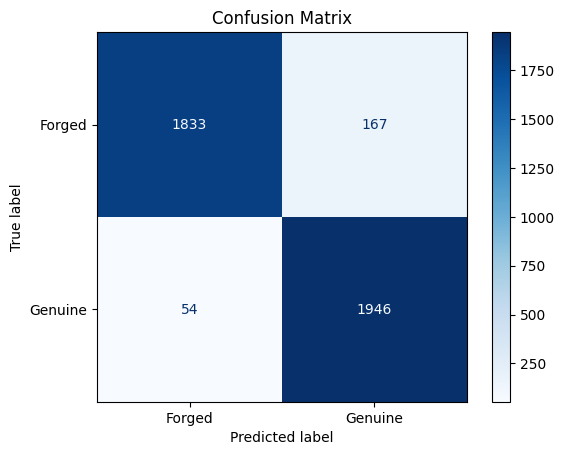

In [94]:
euclidean_distances, actual_labels, predicted_labels, cm = evaluate_and_plot(model, test_loader, distance_threshold=0.25)

# Plot the confusion matrix
plot_confusion_matrix(cm)

Euclidean Distance: 0.0181
Similarity Score: 0.4955
Confidence Score: 0.9821


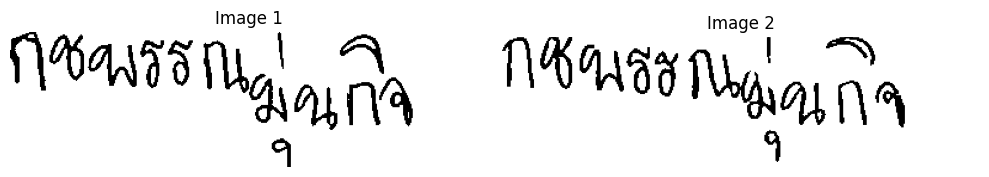

The two signatures are from different people!


In [105]:
from PIL import Image
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# กำหนด transform เหมือนเดิม (resize, normalize, etc.)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # แปลงเป็น Grayscale
    transforms.Resize((117, 290)),  # Resize ขนาดภาพ
    transforms.ToTensor(),  # แปลงเป็น Tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize ค่า pixel
])

# โหลดภาพใหม่ที่ต้องการทดสอบ (คู่ลายเซ็น)
img1_path = 'dataset/w_ls2_27/w_ls227sampNo3.png'
img2_path = 'dataset/w_ls2_27/w_ls227sampNo1.png'

# เปิดภาพและแปลงให้เป็น tensor
img1 = Image.open(img1_path)
img2 = Image.open(img2_path)

img1_tensor = transform(img1).unsqueeze(0).to(device)  # unsqueeze เพิ่ม dimension เป็น (1, 1, 117, 290)
img2_tensor = transform(img2).unsqueeze(0).to(device)

# ส่งภาพทั้งสองผ่านโมเดล
output1, output2 = model(img1_tensor, img2_tensor)

diff = output1 - output2
dist = torch.sqrt(torch.sum(torch.pow(diff, 2), 1) + 1e-8)

# ใช้ Sigmoid เพื่อแปลง Euclidean Distance ให้เป็น Similarity Score
similarity_score = torch.sigmoid(-dist)  # ค่าระยะห่างน้อย => similarity มาก

# แสดงผล
print(f"Euclidean Distance: {dist.item():.4f}")
print(f"Similarity Score: {similarity_score.item():.4f}")

# คำนวณคะแนนความมั่นใจ (confidence score)
confidence = torch.exp(-dist)  # ยิ่ง distance น้อย, confidence ยิ่งสูง

print(f"Confidence Score: {confidence.item():.4f}")

# แสดงภาพ 1 และ ภาพ 2
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(np.array(img1), cmap='gray')
axs[0].set_title(f"Image 1")
axs[0].axis('off')

axs[1].imshow(np.array(img2), cmap='gray')
axs[1].set_title(f"Image 2")
axs[1].axis('off')

plt.tight_layout()
plt.show()

threshold = 0.5  # คุณสามารถปรับได้ตามที่ต้องการ

# เช็คด้วย Similarity Score
if similarity_score.item() > threshold:
    print("The two signatures are from the same person!")
else:
    print("The two signatures are from different people!")

Pair 1: Similarity Score: 0.4912
Pair 2: Similarity Score: 0.4944
Pair 3: Similarity Score: 0.4970
Pair 4: Similarity Score: 0.4863
Pair 5: Similarity Score: 0.4824
Pair 6: Similarity Score: 0.4877
Pair 7: Similarity Score: 0.4971
Pair 8: Similarity Score: 0.4850
Pair 9: Similarity Score: 0.4878
Pair 10: Similarity Score: 0.4688
Pair 11: Similarity Score: 0.4979
Pair 12: Similarity Score: 0.4660
Pair 13: Similarity Score: 0.4900
Pair 14: Similarity Score: 0.4917
Pair 15: Similarity Score: 0.4995
Pair 16: Similarity Score: 0.4786
Pair 17: Similarity Score: 0.4842
Pair 18: Similarity Score: 0.4891
Pair 19: Similarity Score: 0.4981
Pair 20: Similarity Score: 0.4845
Pair 21: Similarity Score: 0.4921
Pair 22: Similarity Score: 0.4965
Pair 23: Similarity Score: 0.4872
Pair 24: Similarity Score: 0.4981
Pair 25: Similarity Score: 0.4972
Pair 26: Similarity Score: 0.4911
Pair 27: Similarity Score: 0.4948
Pair 28: Similarity Score: 0.4926
Pair 29: Similarity Score: 0.4922
Pair 30: Similarity Sco

TypeError: Invalid shape (1, 117, 290) for image data

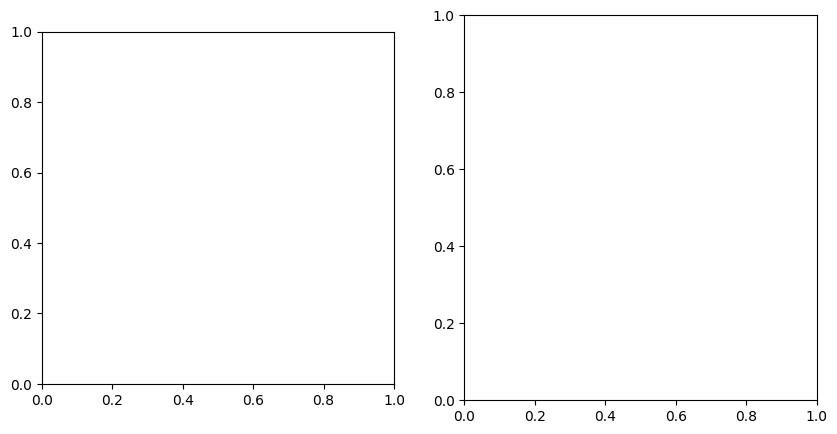

In [110]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# กำหนด threshold
threshold = 0.5
highest_similarity_score = 0
lowest_similarity_score = 1
highest_pair = None
lowest_pair = None

# เก็บผลลัพธ์ที่ similarity > threshold
above_threshold_pairs = []

# รันโมเดลกับ test_loader
model.eval()  # ตั้งโมเดลเป็นโหมด evaluation

with torch.no_grad():  # ไม่ต้องเก็บ gradient
    for img1, img2, label in test_loader:
        img1, img2, label = img1.to(device), img2.to(device), label.to(device)
        
        # ส่งภาพทั้งสองผ่านโมเดล
        output1, output2 = model(img1, img2)

        # คำนวณ Euclidean distance
        diff = output1 - output2
        dist = torch.sqrt(torch.sum(torch.pow(diff, 2), 1) + 1e-8)

        # คำนวณ Similarity Score
        similarity_score = torch.sigmoid(-dist)

        # พิมพ์ similarity score สำหรับแต่ละคู่ใน batch
        for i, score in enumerate(similarity_score):
            print(f"Pair {i+1}: Similarity Score: {score.item():.4f}")

        # หา highest และ lowest similarity จาก batch
        batch_max_similarity = torch.max(similarity_score).item()
        batch_min_similarity = torch.min(similarity_score).item()

        # อัปเดต highest/lowest similarity score
        if batch_max_similarity > highest_similarity_score:
            highest_similarity_score = batch_max_similarity
            highest_pair = (img1, img2)

        if batch_min_similarity < lowest_similarity_score:
            lowest_similarity_score = batch_min_similarity
            lowest_pair = (img1, img2)

        # เก็บคู่ที่มี similarity > threshold
        above_threshold_pairs.extend([(img1[i], img2[i], similarity_score[i].item()) for i in range(len(img1)) if similarity_score[i].item() > threshold])

# แสดงผลลัพธ์
print(f"Highest Similarity Score: {highest_similarity_score}")
print("Highest Similarity Pair:")
# แสดงภาพ pair ที่มี similarity สูงสุด
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# แปลง tensor ไปที่ CPU ก่อน
highest_img1 = highest_pair[0][0].cpu().numpy()
highest_img2 = highest_pair[1][0].cpu().numpy()

axs[0].imshow(highest_img1, cmap='gray')
axs[0].set_title(f"Highest Similarity Image 1")
axs[0].axis('off')

axs[1].imshow(highest_img2, cmap='gray')
axs[1].set_title(f"Highest Similarity Image 2")
axs[1].axis('off')

plt.tight_layout()
plt.show()

print(f"Lowest Similarity Score: {lowest_similarity_score}")
print("Lowest Similarity Pair:")
# แสดงภาพ pair ที่มี similarity ต่ำสุด
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# แปลง tensor ไปที่ CPU ก่อน
lowest_img1 = lowest_pair[0][0].cpu().numpy()
lowest_img2 = lowest_pair[1][0].cpu().numpy()

axs[0].imshow(lowest_img1, cmap='gray')
axs[0].set_title(f"Lowest Similarity Image 1")
axs[0].axis('off')

axs[1].imshow(lowest_img2, cmap='gray')
axs[1].set_title(f"Lowest Similarity Image 2")
axs[1].axis('off')

plt.tight_layout()
plt.show()

print(f"\nNumber of pairs with similarity > {threshold}: {len(above_threshold_pairs)}")